In [4]:
from os import listdir, getcwd, chdir
from os.path import isfile, join
from diff_predictor import data_process, predxgboost
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA


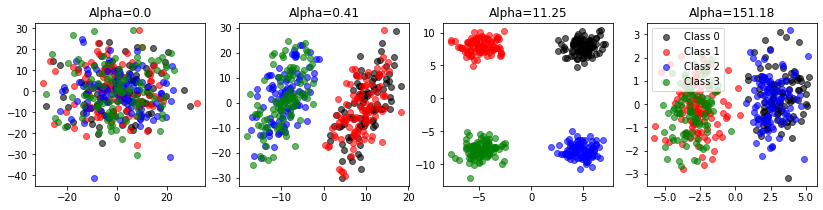

In [1]:
import numpy as np
from contrastive import CPCA

N = 400; D = 30; gap=3
# In B, all the data pts are from the same distribution, which has different variances in three subspaces.
B = np.zeros((N, D))
B[:,0:10] = np.random.normal(0,10,(N,10))
B[:,10:20] = np.random.normal(0,3,(N,10))
B[:,20:30] = np.random.normal(0,1,(N,10))


# In A there are four clusters.
A = np.zeros((N, D))
A[:,0:10] = np.random.normal(0,10,(N,10))
# group 1
A[0:100, 10:20] = np.random.normal(0,1,(100,10))
A[0:100, 20:30] = np.random.normal(0,1,(100,10))
# group 2
A[100:200, 10:20] = np.random.normal(0,1,(100,10))
A[100:200, 20:30] = np.random.normal(gap,1,(100,10))
# group 3
A[200:300, 10:20] = np.random.normal(2*gap,1,(100,10))
A[200:300, 20:30] = np.random.normal(0,1,(100,10))
# group 4
A[300:400, 10:20] = np.random.normal(2*gap,1,(100,10))
A[300:400, 20:30] = np.random.normal(gap,1,(100,10))
A_labels = [0]*100+[1]*100+[2]*100+[3]*100

cpca = CPCA(standardize=False)
cpca.fit_transform(A, B, plot=True, active_labels=A_labels)

In [6]:
workbookDir = getcwd()

print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir"
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /Users/nelsschimek/Documents/nancelab/diff_predictor/notebooks
Using current directory for loading data: /Users/nelsschimek/Documents/nancelab/diff_predictor


In [16]:
age_feature_path = workbookDir + '/data/raw_data_age/'
age_feature_filelist = [f for f in listdir(age_feature_path) if isfile(join(age_feature_path, f)) and 'feat' in f]
print(len(age_feature_filelist))

age_msd_path = workbookDir + '/raw_data_age/'
age_msd_filelist = [f for f in listdir(age_msd_path) if isfile(join(age_msd_path, f)) and 'msd' in f]
print(len(age_msd_filelist))

region_dataset_path = workbookDir + '/data/region_feature_folder/'
region_filelist = [f for f in listdir(region_dataset_path) if isfile(join(region_dataset_path, f)) and 'feat' in f]
print(len(region_filelist))

treatment_dataset_path = workbookDir + '/pnn_feature_folder/'
treatment_filelist = [f for f in listdir(treatment_dataset_path) if isfile(join(treatment_dataset_path, f)) and 'feat' in f]
print(len(treatment_filelist))

75
74
38
180


In [17]:
features = [
    'alpha', # Fitted anomalous diffusion alpha exponenet
    'D_fit', # Fitted anomalous diffusion coefficient
    'kurtosis', # Kurtosis of track
    'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
    'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
    'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
    'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
    'elongation', # Est. of amount of extension of trajectory from centroid
    'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
    'fractal_dim', # Measure of how complicated a self similar figure is
    'trappedness', # Probability that a particle with Deff is trapped in a region
    'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
    'straightness', # Ratio of net displacement to the sum of squared step lengths
    'MSD_ratio', # MSD ratio of the track
#     'frames', # Number of frames the track spans
    'Deff1', # Effective diffusion coefficient at 0.33 s
    'Deff2', # Effective diffusion coefficient at 3.3 s
    #'angle_mean', # Mean turning angle which is counterclockwise angle from one frame point to another
    #'angle_mag_mean', # Magnitude of the turning angle mean
    #'angle_var', # Variance of the turning angle
    #'dist_tot', # Total distance of the trajectory
    #'dist_net', # Net distance from first point to last point
    #'progression', # Ratio of the net distance traveled and the total distance
    'Mean alpha', 
    'Mean D_fit', 
    'Mean kurtosis', 
    'Mean asymmetry1', 
    'Mean asymmetry2',
    'Mean asymmetry3', 
    'Mean AR',
    'Mean elongation', 
    'Mean boundedness',
    'Mean fractal_dim', 
    'Mean trappedness', 
    'Mean efficiency',
    'Mean straightness', 
    'Mean MSD_ratio', 
    'Mean Deff1', 
    'Mean Deff2',
    ]

In [21]:
fstats_tot = data_process.generate_fullstats(treatment_dataset_path, treatment_filelist, ['NT', 'ChABC'], 'treatment')

Adding file features_NT_brain_1_slice_1_vid_2.csv size: (1479, 23)
Adding file features_ChABC_brain_4_slice_3_vid_5.csv size: (1966, 23)
Adding file features_NT_brain_4_slice_1_vid_1.csv size: (780, 23)
Adding file features_ChABC_brain_2_slice_2_vid_1.csv size: (1788, 23)
Adding file features_ChABC_brain_4_slice_3_vid_4.csv size: (2689, 23)
Adding file features_NT_brain_1_slice_1_vid_3.csv size: (1560, 23)
Adding file features_NT_brain_1_slice_1_vid_1.csv size: (1161, 23)
Adding file features_NT_brain_4_slice_1_vid_2.csv size: (648, 23)
Adding file features_ChABC_brain_1_slice_3_vid_5.csv size: (1212, 23)
Adding file features_ChABC_brain_3_slice_2_vid_5.csv size: (2084, 23)
Adding file features_ChABC_brain_2_slice_2_vid_3.csv size: (1336, 23)
Adding file features_ChABC_brain_3_slice_2_vid_4.csv size: (1240, 23)
Adding file features_ChABC_brain_2_slice_2_vid_2.csv size: (714, 23)
Adding file features_ChABC_brain_1_slice_3_vid_4.csv size: (1594, 23)
Adding file features_NT_brain_4_slice_

In [24]:
fstats_tot.columns

Index(['Track_ID', 'alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2',
       'asymmetry3', 'AR', 'elongation', 'boundedness', 'fractal_dim',
       'trappedness', 'efficiency', 'straightness', 'MSD_ratio', 'frames', 'X',
       'Y', 'Quality', 'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Deff2',
       'treatment', 'Filename', 'Video Number'],
      dtype='object')

In [22]:
ecm = fstats_tot[features + ['treatment']]
ecm = ecm[~ecm[list(set(features) - set(['Deff2', 'Mean Deff2']))].isin([np.nan, np.inf, -np.inf]).any(1)]       # Removing nan and inf data points
ecm = ecm.fillna(0) #setting any Deff2 values that are NA to 0
ecm.shape

KeyError: "['Mean alpha', 'Mean D_fit', 'Mean kurtosis', 'Mean asymmetry1', 'Mean asymmetry2', 'Mean asymmetry3', 'Mean AR', 'Mean elongation', 'Mean boundedness', 'Mean fractal_dim', 'Mean trappedness', 'Mean efficiency', 'Mean straightness', 'Mean MSD_ratio', 'Mean Deff1', 'Mean Deff2'] not in index"